import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [7]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [2]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [3]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [17]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/49

make measure image

In [8]:
def_img = io.imread("image\\10.16.2020 Heptane-60%water40%ethanol\\frame 4\\1-26-03 PM\\10.16.2020 (5) 0307.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

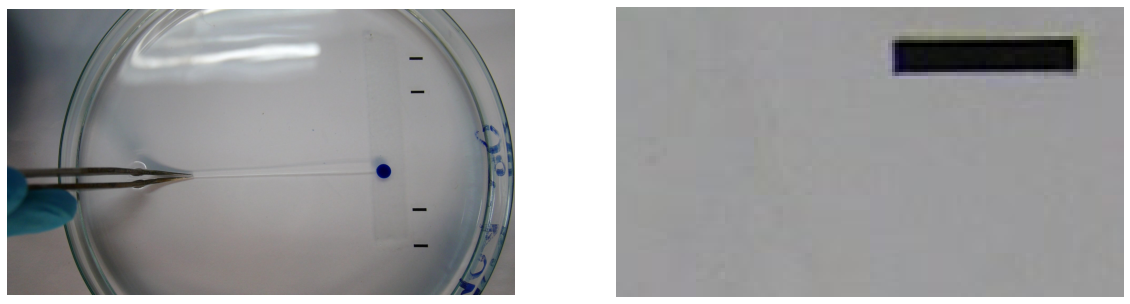

In [14]:
measure_im = crop(def_img, ((300, 700), (1450, 330), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

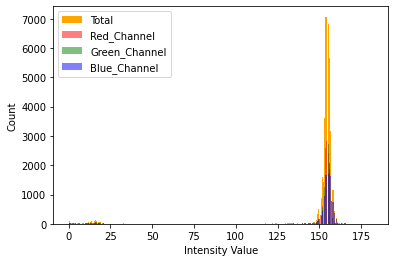

In [15]:
plot_histogram(measure_im)

[14, 77]
[13, 126]


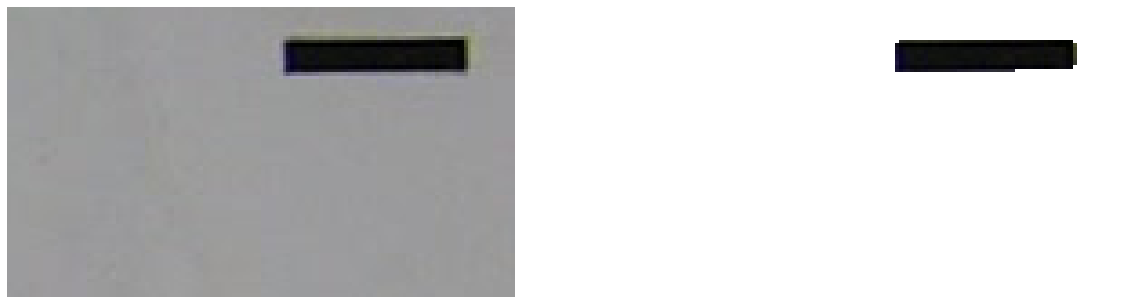

length of picture is  49.01020301937138 pixel


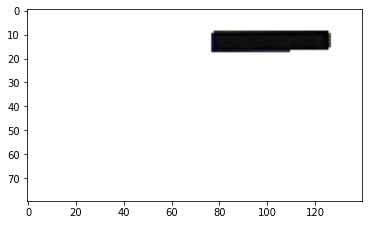

In [16]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

49 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 49


find definition length 

(1080, 1920, 3) (100, 760, 3)


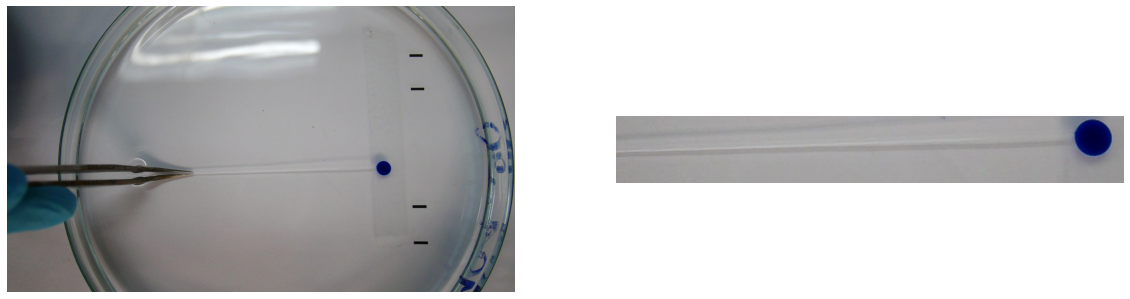

In [25]:
def_crop_im = crop(def_img, ((580, 400), (710, 450), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

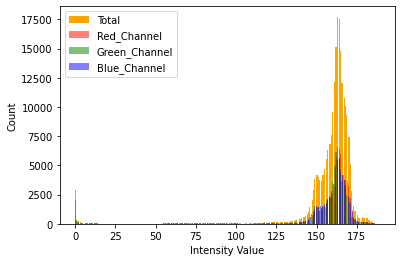

In [26]:
plot_histogram(def_crop_im)

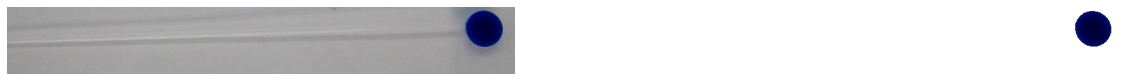

In [27]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[30, 687]
[34, 740]
ldef  53.150729063673246 pixel


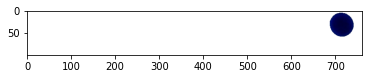

In [28]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 0307 to 0491

In [29]:
number_of_picture = 307
thresh = 45
template1 = []
l_def = 53.150729063673246
#491-307 = 184
for i in range(185):
    if(True) :   
        image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 4\\1-26-03 PM\\10.16.2020 (5) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((580, 400), (710, 450), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [30]:
print(template1)
print(len(template1))

[0, 3, 4, 6, 9, 11, 15, 17, 19, 21, 24, 27, 29, 31, 34, 37, 35, 42, 43, 44, 47, 50, 52, 55, 56, 58, 60, 63, 68, 68, 73, 76, 79, 79, 82, 83, 83, 87, 90, 91, 94, 96, 100, 99, 100, 107, 106, 108, 110, 113, 115, 115, 118, 121, 121, 126, 127, 131, 125, 132, 134, 138, 139, 137, 141, 145, 145, 150, 150, 155, 156, 158, 156, 161, 156, 163, 163, 169, 170, 173, 175, 177, 179, 180, 182, 182, 186, 185, 187, 191, 191, 196, 194, 197, 198, 201, 204, 206, 207, 207, 211, 209, 212, 215, 215, 215, 218, 219, 219, 221, 227, 221, 227, 220, 232, 230, 235, 237, 238, 243, 243, 242, 245, 246, 249, 249, 250, 255, 255, 255, 254, 258, 261, 263, 264, 265, 267, 267, 271, 271, 266, 275, 275, 277, 281, 282, 282, 284, 285, 286, 291, 291, 291, 292, 293, 294, 296, 298, 300, 297, 301, 297, 297, 305, 304, 306, 312, 313, 313, 315, 315, 314, 320, 321, 322, 323, 326, 328, 328, 329, 330, 332, 333, 335, 338]
185


find length on crop value 2 from 0492 to 1704 

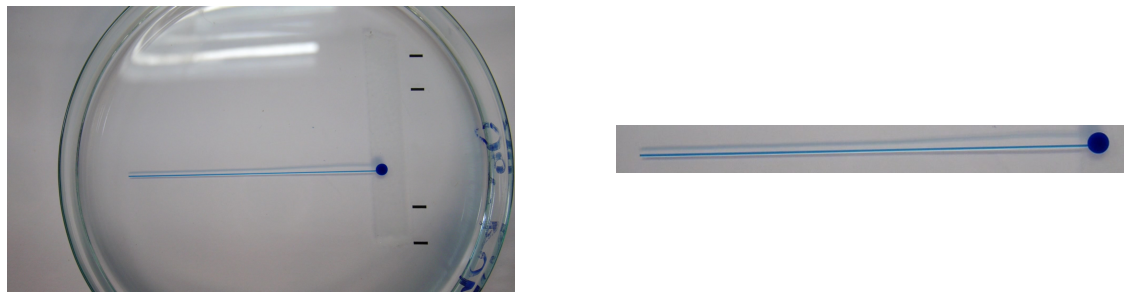

In [35]:
image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 4\\1-26-03 PM\\10.16.2020 (5) " + str(1704).zfill(4) + ".jpg" )
crop_image = crop(image, ((580, 400), (410, 450), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [36]:
number_of_picture = 492
thresh = 45
template2 = []
l_def = 53.150729063673246
#1704-492 = 1212
for i in range(1213):
    if( True) :
        image = mpimg.imread( "image\\10.16.2020 Heptane-60%water40%ethanol\\frame 4\\1-26-03 PM\\10.16.2020 (5) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((580, 400), (410, 450), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [37]:
print(template2)
print(len(template2))

[338, 341, 342, 338, 343, 344, 347, 349, 350, 351, 351, 353, 353, 355, 354, 359, 359, 358, 360, 354, 350, 359, 362, 354, 362, 354, 355, 353, 359, 354, 367, 358, 354, 377, 378, 379, 386, 386, 385, 386, 389, 388, 393, 393, 393, 397, 397, 399, 402, 403, 402, 401, 404, 402, 404, 406, 408, 409, 410, 411, 413, 418, 417, 418, 418, 421, 423, 423, 424, 425, 423, 427, 428, 425, 433, 430, 417, 433, 433, 432, 436, 436, 437, 435, 433, 446, 444, 445, 448, 446, 450, 446, 452, 453, 453, 454, 455, 458, 458, 459, 458, 460, 462, 465, 465, 462, 450, 466, 466, 471, 470, 465, 465, 473, 469, 478, 480, 474, 478, 481, 466, 481, 487, 483, 487, 488, 487, 487, 492, 493, 493, 497, 497, 497, 500, 500, 501, 502, 502, 503, 505, 506, 508, 508, 510, 512, 512, 512, 513, 515, 516, 517, 518, 520, 520, 521, 522, 524, 525, 526, 528, 528, 528, 528, 529, 530, 534, 535, 533, 534, 536, 536, 536, 541, 542, 544, 541, 544, 541, 546, 547, 544, 550, 550, 551, 553, 553, 553, 555, 555, 557, 557, 560, 560, 562, 561, 563, 563, 565, 565,

concat 2 template and calculate pixel to centimeter

In [38]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [39]:
print(l_array)

[0.         0.03061225 0.04081633 ... 9.418367   9.418367   9.428572  ]


export data to exel

In [40]:
import pandas as pd

In [41]:
print(len(l_array))

1398


In [42]:
data = []
num_img = 307
for i in range(len(l_array)):
    data.append(( " 10.16.2020 (5) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptanewater-60-40(4)_10.16.2020_1-26-03-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


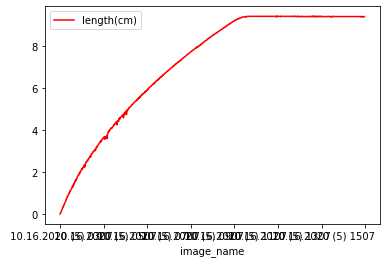

In [43]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()